In [1]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


# import the libraries

In [2]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt



# Load pretrained model

In [3]:
# Load the pretrained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Class labels from official PyTorch documentation for the pretrained model
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'Bus','Tractor',
    'truck','Auto','Tempo Traveller','van','boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]


C:\Users\saumy\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\saumy\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Getting the predictions

In [4]:
def get_prediction(img_path, threshold):
    # Open the image
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)

    # Get predictions from the model
    with torch.no_grad():
        pred = model([img])

    # Filter predictions based on threshold
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[i[0], i[1], i[2], i[3]] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    pred_boxes = pred_boxes[:pred_t + 1]
    pred_class = pred_class[:pred_t + 1]
    return pred_boxes, pred_class


# Performing object detection and displaying the results

In [5]:

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=1, text_th=3):
    # Get predictions
    boxes, pred_cls = get_prediction(img_path, threshold)

    # Open the image with OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Loop over the predictions and draw bounding boxes
    for i in range(len(boxes)):
        box = boxes[i]
        pred_class = pred_cls[i]

        # Extract coordinates for drawing the rectangle and text
        x1, y1, x2, y2 = box

        # Convert the coordinates to integers
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Draw the rectangle
        cv2.rectangle(img, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=rect_th)

        # Draw the class label text above the rectangle
        cv2.putText(img, pred_class, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 255, 0), thickness=text_th)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()



# Calling the object detection RCNN model

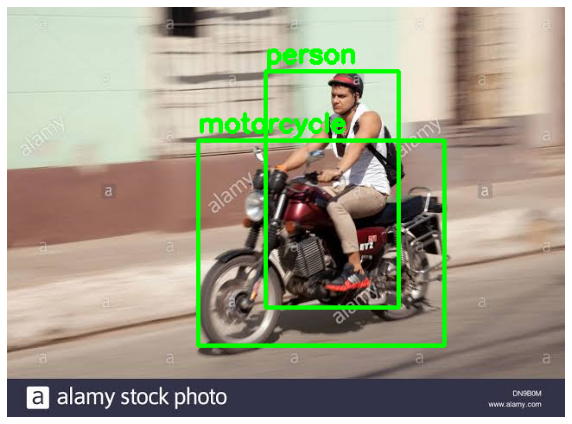

In [6]:
img_path = "C:\\Users\\saumy\\Downloads\\object detection\\Dataset\\motor cycle\\1570811001026.jpeg"
object_detection_api(img_path, threshold=0.8)

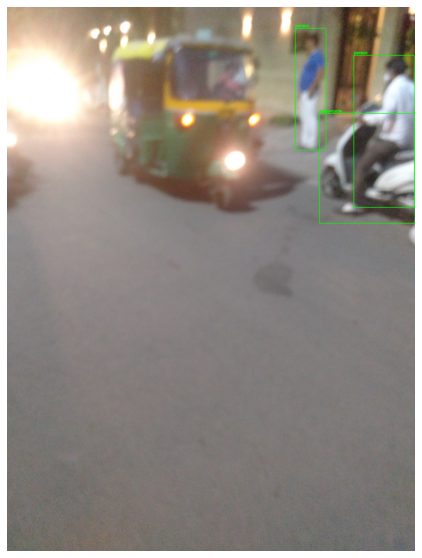

In [7]:
img_path = "C:\\Users\\saumy\\Downloads\\object detection\\Dataset\\Auto\\Datacluster Auto (111).jpg"
object_detection_api(img_path, threshold=0.8)

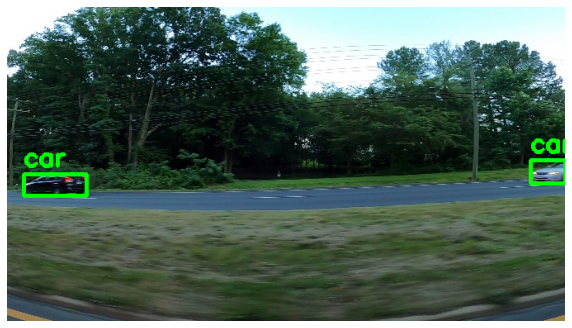

In [8]:
img_path = "C:\\Users\\saumy\\Downloads\\object detection\\Dataset\\car\\vid_4_9800.jpg"
object_detection_api(img_path, threshold=0.8)

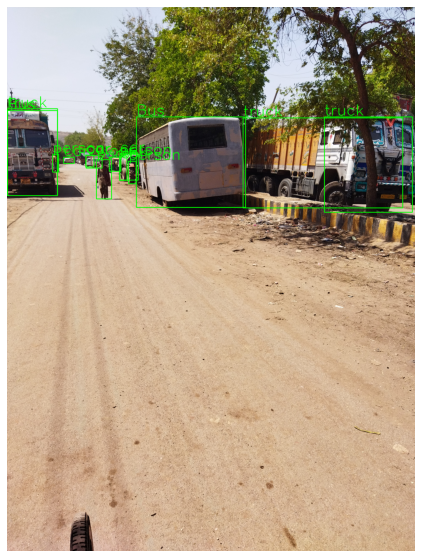

In [9]:
img_path = "C:\\Users\\saumy\\Downloads\\object detection\\Dataset\\Bus\\20210528_10_41_42_000_2sQ7uoDSHQakPcTTKy9Ikfs5wWs1_F_3264_2448.jpg"
object_detection_api(img_path, threshold=0.5,text_size=3)

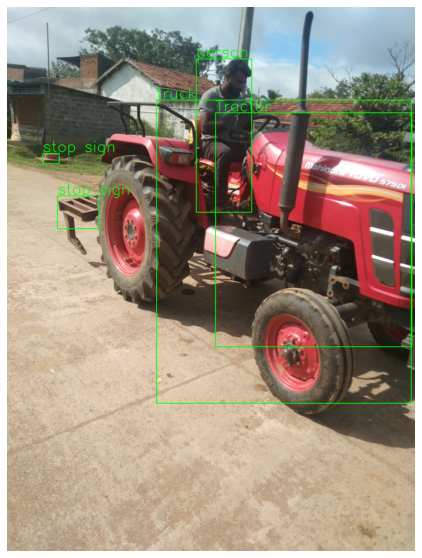

In [10]:
img_path = "C:\\Users\\saumy\\Downloads\\object detection\\Dataset\\Tractor\\20210601_22_14_54_000_jQ7AVTD6PsfYGnsr70ApCCT0mmV2_F_3264_2448.jpg"
object_detection_api(img_path, threshold=0.5,text_size=3)

# Conclusion:
This code implements an object detection API using the Faster R-CNN model. It takes an input image, detects objects in the image, and displays the image with bounding boxes and class labels for the detected objects. 